In [ ]:
import pandas as pd
from utils.myutils import Utils

%load_ext autoreload
%autoreload 2
utils = Utils()
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_base_normal = pd.read_json(
    "experiments/complete/gplvm/000_gplvm_normal_03_best.json"
)

In [ ]:
df_base_contaminated = pd.read_json(
    "experiments/complete/gplvm/001_gplvm_contaminated.json"
)

In [ ]:
df_base_normal[["training_time"]].sort_values("training_time")

In [ ]:
df_base_normal[["test_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["train_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["labeled_anomalies"]] = 1.0
df_base_normal[["method"]] = "ground_truth"

In [ ]:
df_base_contaminated[["test_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["train_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["labeled_anomalies"]] = 0
df_base_contaminated[["method"]] = "blind"

# Epochs

In [ ]:
df_epochs_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_100.json"
)
df_epochs_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_1000.json"
)
df_epochs_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json"
)
df_epochs_0100_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_100.json"
)
df_epochs_1000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json"
)
df_epochs_5000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json"
)

In [ ]:
df_loe = utils.read_json_from_folder("experiments/complete/loe/")

In [ ]:
df_loe

In [ ]:
df_soft_100 = df_loe[(df_loe.method == "soft") & (df_loe.labeled_anomalies == 1.00)]
df_refine_100 = df_loe[(df_loe.method == "refine") & (df_loe.labeled_anomalies == 1.00)]

In [ ]:
comparative = pd.concat(
    [df_epochs_1000, df_soft_100[["dataset", "aucroc"]].reset_index()], axis=1
)
comparative.head(5)

In [ ]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            df_soft_100[["aucroc"]].rename(columns={"aucroc": "100_C_SOFT_100"}),
            df_refine_100[["aucroc"]].rename(columns={"aucroc": "100_C_REFINE_100"}),
            df_epochs_1000.rename(columns={"GPLVM": "1000_N"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            df_epochs_1000_c.rename(columns={"GPLVM": "1000_C"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
plt.xticks(rotation=-45)
None

In [ ]:
# ALT VS START

In [ ]:
# loe_x = utils.read_json_from_folder("experiments/complete/loe_x/")

In [67]:
df_soft_alt = pd.read_json("experiments/complete/loe_x/00_all_soft_alt_la_100.json")
df_hard_alt = pd.read_json("experiments/complete/loe_x/00_all_hard_alt_la_100.json")
df_soft_start = pd.read_json("experiments/complete/loe_x/00_all_soft_start_la_100.json")
df_hard_start = pd.read_json("experiments/complete/loe_x/00_all_hard_start_la_100.json")
df_soft_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_soft_padrao_la_100.json"
)
df_hard_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_hard_padrao_la_100.json"
)
df_refine_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_refine_padrao_la_100.json"
)
df_blind_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_blind_padrao_la_100.json"
)

In [ ]:
compare_1000 = pd.concat(
    [df_epochs_1000_c[["GPLVM"]], df_soft_alt[["aucroc", "dataset", "n_epochs"]]],
    axis=1,
)
compare_1000.query("aucroc < 0.2")

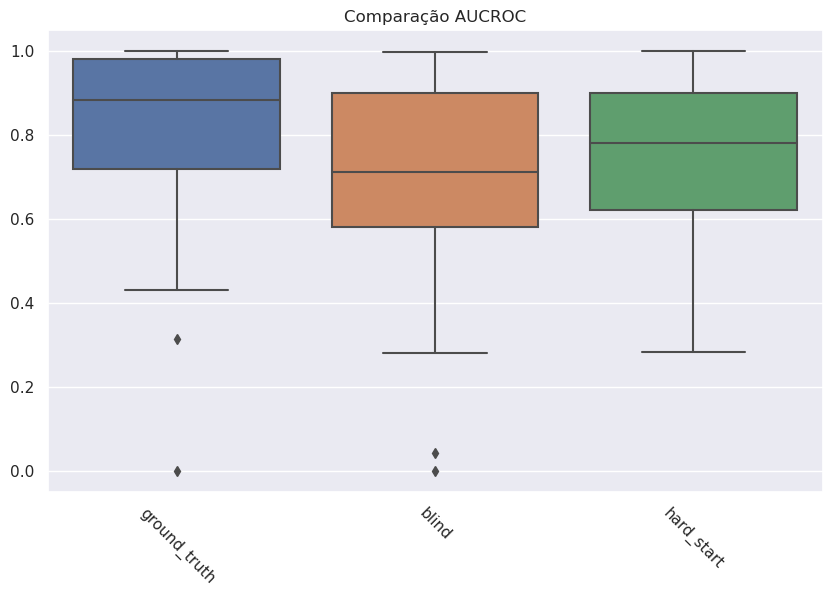

In [80]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            df_epochs_1000.rename(columns={"GPLVM": "ground_truth"}),
            # df_epochs_1000_c.rename(columns={"GPLVM": "blind"}),
            df_blind_padrao[["aucroc"]].rename(columns={"aucroc": "blind"}),
            # df_refine_100[["aucroc"]].rename(columns={"aucroc": "refine"}),
            # df_refine_padrao[["aucroc"]].rename(columns={"aucroc": "refine_1000"}),
            # df_soft_alt[["aucroc"]].rename(columns={"aucroc": "soft_alt"}),
            # df_refine_50[["aucroc"]].rename(columns={"aucroc": "refine"}),
            # df_hard_alt[["aucroc"]].rename(columns={"aucroc": "hard_alt"}),
            # df_soft_padrao[["aucroc"]].rename(columns={"aucroc": "soft_padrao"}),
            # df_soft_start[["aucroc"]].rename(columns={"aucroc": "soft_start"}),
            # df_hard_padrao[["aucroc"]].rename(columns={"aucroc": "hard_padrao"}),
            df_hard_start[["aucroc"]].rename(columns={"aucroc": "hard_start"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
s.set_title("Comparação AUCROC")
plt.xticks(rotation=-45)
None

In [94]:
df_epochs_1000.GPLVM.quantile(q=[0.25, 0.5, 0.75])

0.25    0.718505
0.50    0.882748
0.75    0.981058
Name: GPLVM, dtype: float64

In [96]:
df_blind_padrao.aucroc.quantile(q=[0.25, 0.5, 0.75])

0.25    0.581590
0.50    0.711116
0.75    0.900144
Name: aucroc, dtype: float64

In [97]:
df_hard_start.aucroc.quantile(q=[0.25, 0.5, 0.75])

0.25    0.621996
0.50    0.780982
0.75    0.899988
Name: aucroc, dtype: float64

In [ ]:
df_epochs_1000_c_joined = pd.concat(
    [
        df_epochs_1000_c,
        df_soft_100[["dataset", "train_ratio"]].reset_index(),
    ],
    axis=1,
)

In [ ]:
(
    df_hard_start[df_hard_start.train_ratio > 0.3][["aucroc"]].median(),
    df_soft_start[df_soft_start.train_ratio > 0.3][["aucroc"]].median(),
    df_hard_alt[df_hard_start.train_ratio > 0.3][["aucroc"]].median(),
    df_soft_alt[df_soft_start.train_ratio > 0.3][["aucroc"]].median(),
    df_refine_100[df_refine_100.train_ratio > 0.3][["aucroc"]].median(),
    df_epochs_1000_c_joined[df_epochs_1000_c_joined.train_ratio > 0.3][
        ["GPLVM"]
    ].median(),
)

In [ ]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            # df_epochs_1000.rename(columns={"GPLVM": "ground"}),
            # df_epochs_1000_c.rename(columns={"GPLVM": "blind"}),
            df_soft_alt[["aucpr"]].rename(columns={"aucpr": "soft_alt"}),
            df_hard_alt[["aucpr"]].rename(columns={"aucpr": "hard_alt"}),
            df_soft_start[["aucpr"]].rename(columns={"aucpr": "soft_start"}),
            df_hard_start[["aucpr"]].rename(columns={"aucpr": "hard_start"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
plt.xticks(rotation=-45)
None